# 04 - Multi-variable Linear Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.1.0


# Multi-variable linear regression
Predicting exam score - regression using three inputs (x1, x2, x3)

x1 (quiz 1) | x2 (quiz 2) | x3 (mid 1) | Y (final)
---- | ---- | ----| ----
73 | 80 | 75 | 152
93 | 88 | 93 | 185
89 | 91 | 90 | 180
96 | 98 | 100 | 196
73 | 66 | 70 | 142


Test Scores for General Psychology ( https://goo.gl/g2T8Kp )

# Matrix multiplication

## dot product(=scalar product, 내적)
<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg" >


https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Multi-feature regression

### Hypothesis

$$ H(x) = w x + b $$

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

# Hypothesis using matrix

$$ H(x_1, x_2, x_3) = \underline{w_1 x_1 + w_2 x_2 + w_3 x_3} + b $$

$$ w_1 x_1 + w_2 x_2 + w_3 x_3 $$ 

$$ \begin{pmatrix} w_{ 1 } & w_{ 2 } & w_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \end{pmatrix} $$

$$ WX $$ (W, X 는 matrix)

# Hypothesis without b

$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

$$ = b + w_1 x_1 + w_2 x_2 + w_3 x_3 $$

$$ = \begin{pmatrix} b & x_{ 1 } & x_{ 2 } & x_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} 1 \\ w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix} $$

$$ = XW $$



# Hypothesis using matrix 

### Many x instances

$$ \begin{pmatrix} x_{ 11 } & x_{ 12 } & x_{ 13 } \\ x_{ 21 } & x_{ 22 } & x_{ 23 } \\ x_{ 31 } & x_{ 32 } & x_{ 33 }\\ x_{ 41 } & x_{ 42 } & x_{ 43 }\\ x_{ 51 } & x_{ 52 } & x_{ 53 }\end{pmatrix} \cdot \begin{pmatrix} w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix}=\begin{pmatrix} x_{ 11 }w_{ 1 }+x_{ 12 }w_{ 2 }+x_{ 13 }w_{ 3 } \\ x_{ 21 }w_{ 1 }+x_{ 22 }w_{ 2 }+x_{ 23 }w_{ 3 }\\ x_{ 31 }w_{ 1 }+x_{ 32 }w_{ 2 }+x_{ 33 }w_{ 3 } \\ x_{ 41 }w_{ 1 }+x_{ 42 }w_{ 2 }+x_{ 43 }w_{ 3 } \\ x_{ 51 }w_{ 1 }+x_{ 52 }w_{ 2 }+x_{ 53 }w_{ 3 } \end{pmatrix} $$

$$ [5, 3] \cdot [3, 1] = [5, 1] $$

$$ H(X) = XW $$

5는 데이터(instance)의 수, 3은 변수(feature)의 수, 1은 결과

# Hypothesis using matrix (n output)

$$ [n, 3] \cdot [?, ?] = [n, 2] $$

$$ H(X) = XW $$

* n은 데이터(instance)의 개수, 2는 결과 값의 개수로 주어진다.
* 이때, W [?, ?] ⇒ [3, 2]

# WX vs XW

### Theory (Lecture) :
 $$ H(x) = Wx + b  $$

### TensorFlow (Implementation) :

$$ H(X) = XW $$

# Simple Example (2 variables)

x1 | x2 | y
---- | ---- | ----
1  |  0  |  1
0  |  2  |  2
3  |  0  |  3
0  |  4  |  4
5  |  0  |  5

In [2]:
tf.random.set_seed(0)  # for reproducibility

In [3]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b  = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))


    0 | 335.280823 |    -4.0663 |     1.1220 |  -6.065215
   50 |  76.037262 |    -0.8001 |     1.6209 |  -4.978779
  100 |  18.959263 |     0.7151 |     1.8781 |  -4.429109
  150 |   6.310240 |     1.4125 |     2.0104 |  -4.134423
  200 |   3.445082 |     1.7284 |     2.0768 |  -3.961648
  250 |   2.743659 |     1.8667 |     2.1075 |  -3.847750
  300 |   2.525401 |     1.9225 |     2.1184 |  -3.762738
  350 |   2.417754 |     1.9402 |     2.1181 |  -3.692262
  400 |   2.337300 |     1.9403 |     2.1114 |  -3.629400
  450 |   2.264998 |     1.9325 |     2.1008 |  -3.570778
  500 |   2.196328 |     1.9213 |     2.0881 |  -3.514729
  550 |   2.130126 |     1.9085 |     2.0741 |  -3.460409
  600 |   2.066037 |     1.8953 |     2.0595 |  -3.407385
  650 |   2.003917 |     1.8819 |     2.0444 |  -3.355424
  700 |   1.943679 |     1.8686 |     2.0293 |  -3.304398
  750 |   1.885258 |     1.8555 |     2.0141 |  -3.254230
  800 |   1.828595 |     1.8425 |     1.9990 |  -3.204873
  850 |   1.77

# Simple Example (2 variables with Matrix)

In [4]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0))
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b # (1, 2) * (2, 5) = (1, 5)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

    0 |  36.403778 |    -0.6231 |    -0.3508 |  -0.961774
   50 |   9.372901 |     0.2914 |     0.1682 |  -0.557764
  100 |   2.639858 |     0.7060 |     0.4867 |  -0.347756
  150 |   0.825069 |     0.8912 |     0.6846 |  -0.235665
  200 |   0.284990 |     0.9721 |     0.8088 |  -0.174012
  250 |   0.106844 |     1.0062 |     0.8873 |  -0.138953
  300 |   0.042677 |     1.0195 |     0.9372 |  -0.118279
  350 |   0.018044 |     1.0241 |     0.9690 |  -0.105598
  400 |   0.008188 |     1.0250 |     0.9893 |  -0.097477
  450 |   0.004138 |     1.0246 |     1.0022 |  -0.092026
  500 |   0.002439 |     1.0239 |     1.0104 |  -0.088173
  550 |   0.001710 |     1.0230 |     1.0156 |  -0.085299
  600 |   0.001384 |     1.0223 |     1.0188 |  -0.083036
  650 |   0.001227 |     1.0217 |     1.0207 |  -0.081161
  700 |   0.001142 |     1.0212 |     1.0218 |  -0.079538
  750 |   0.001088 |     1.0207 |     1.0224 |  -0.078080
  800 |   0.001046 |     1.0203 |     1.0227 |  -0.076735
  850 |   0.00

# Hypothesis without b

In [5]:
import tensorflow as tf

# 앞의 코드에서 bias(b)를 행렬에 추가
x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 3), -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) # b가 없다
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  16.019751 |    -0.1985 |     0.3424 |    -0.6835
   50 |   5.635924 |     0.0582 |     0.6809 |    -0.1215
  100 |   2.141112 |     0.1997 |     0.8238 |     0.2356
  150 |   0.862825 |     0.2786 |     0.8808 |     0.4641
  200 |   0.367090 |     0.3227 |     0.9015 |     0.6112
  250 |   0.167513 |     0.3468 |     0.9074 |     0.7064
  300 |   0.085210 |     0.3593 |     0.9082 |     0.7684
  350 |   0.050615 |     0.3649 |     0.9074 |     0.8090
  400 |   0.035731 |     0.3663 |     0.9067 |     0.8359
  450 |   0.029064 |     0.3651 |     0.9063 |     0.8539
  500 |   0.025846 |     0.3624 |     0.9064 |     0.8661
  550 |   0.024085 |     0.3587 |     0.9069 |     0.8746
  600 |   0.022948 |     0.3544 |     0.9076 |     0.8807
  650 |   0.022085 |     0.3497 |     0.9086 |     0.8852
  700 |   0.021348 |     0.3449 |     0.9097 |     0.8887
  750 |   0.020676 |     0.3400 |     0.9109 |     0.8916
  800 |   0.020042 |     0.3350 |     0.9121 |     0.8940
  850 |   0.01

# Custom Gradient
* tf.train.GradientDescentOptimizer(): optimizer
* optimizer.apply_gradients(): update

In [6]:
# Multi-variable linear regression (1)

X = tf.constant([[1., 2.], 
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")
for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])
    
    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:10.6f}".format(i, cost.numpy()))


epoch | cost
    0 |  21.726822
   50 |   0.258689
  100 |   0.176868
  150 |   0.120926
  200 |   0.082678
  250 |   0.056528
  300 |   0.038649
  350 |   0.026424
  400 |   0.018067
  450 |   0.012352
  500 |   0.008445
  550 |   0.005774
  600 |   0.003948
  650 |   0.002699
  700 |   0.001845
  750 |   0.001262
  800 |   0.000863
  850 |   0.000590
  900 |   0.000403
  950 |   0.000276
 1000 |   0.000189


# Predicting exam score
regression using three inputs (x1, x2, x3)

x1 (quiz 1) | x2 (quiz 2) | x3 (mid 1) | Y (final)
---- | ---- | ----| ----
73 | 80 | 75 | 152
93 | 88 | 93 | 185
89 | 91 | 90 | 180
96 | 98 | 100 | 196
73 | 66 | 70 | 142

In [7]:
tf.random.set_seed(0)  # for reproducibility


```python
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# weights
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b  = tf.Variable(10.)

hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b        
```

In [8]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# weights
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b  = tf.Variable(10.)

learning_rate = 0.000001

for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 | 5793889.5000
   50 |   64291.1562
  100 |     715.2903
  150 |       9.8461
  200 |       2.0152
  250 |       1.9252
  300 |       1.9210
  350 |       1.9177
  400 |       1.9145
  450 |       1.9114
  500 |       1.9081
  550 |       1.9050
  600 |       1.9018
  650 |       1.8986
  700 |       1.8955
  750 |       1.8923
  800 |       1.8892
  850 |       1.8861
  900 |       1.8829
  950 |       1.8798
 1000 |       1.8767


## Multi-variable linear regression (1)
*  random  초기화: tf.random_normal()


In [10]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# random weights
w1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b  = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))


    0 |   29366.5117
   50 |     349.3437
  100 |      27.3175
  150 |      23.6930
  200 |      23.6017
  250 |      23.5498
  300 |      23.4984
  350 |      23.4471
  400 |      23.3960
  450 |      23.3451
  500 |      23.2943
  550 |      23.2437
  600 |      23.1931
  650 |      23.1428
  700 |      23.0925
  750 |      23.0422
  800 |      22.9923
  850 |      22.9424
  900 |      22.8928
  950 |      22.8430
 1000 |      22.7937


## Multi-variable linear regression (2)

* Matrix 사용

In [11]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 201300.4688
  100 |    74.4386
  200 |    49.4028
  300 |    49.1406
  400 |    48.8831
  500 |    48.6269
  600 |    48.3722
  700 |    48.1188
  800 |    47.8666
  900 |    47.6159
 1000 |    47.3666
 1100 |    47.1186
 1200 |    46.8720
 1300 |    46.6266
 1400 |    46.3825
 1500 |    46.1397
 1600 |    45.8983
 1700 |    45.6582
 1800 |    45.4195
 1900 |    45.1820
 2000 |    44.9457


In [12]:
W.numpy()

array([[ 1.5288262],
       [-1.1683029],
       [ 1.6296498]], dtype=float32)

In [13]:
b.numpy()

array([0.66334724], dtype=float32)

In [14]:
tf.matmul(X, W) + b

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[141.02716],
       [191.59097],
       [177.08179],
       [195.90196],
       [149.23515]], dtype=float32)>

## predict

In [15]:
Y # labels, 실제값

[152.0, 185.0, 180.0, 196.0, 142.0]

In [16]:
predict(X).numpy() # prediction, 예측값

array([[141.02716],
       [191.59097],
       [177.08179],
       [195.90196],
       [149.23515]], dtype=float32)

In [17]:
# 새로운 데이터에 대한 예측

predict([[ 89.,  95.,  92.],[ 84.,  92.,  85.]]).numpy() 

array([[175.6679 ],
       [160.12111]], dtype=float32)

# Lab 05 Logistic Classification(Regression) - Eager Execution
* Logistic Classfication은 True or False와 같은 Binary나 복수개의 다항 분류에 쓰입니다 (Bernoulli Distribution)

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.1.0


### 강의에 설명할 Data입니다
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제입니다
* Logistic Classification 통해 보라색과 노란색 y_data(Label)을 구분해 보겠습니다.
* Test 데이터는 붉은색의 위치와 같이 추론시 1의 값을 가지게 됩니다.

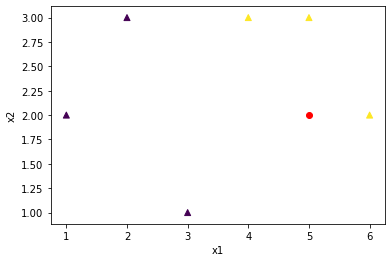

In [2]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow Eager
### 위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

### 위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다
* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([2, 1]) )

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

### Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

$$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [5]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

### 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if  &  y=0
\end{align}
$$

* 위 두수식을 합치면 아래과 같습니다
$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

### 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴합니다.
* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환합니다.
* 가설을 통해 실재 값과 비교한 정확도를 측정합니다

In [7]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

### GradientTape를 통해 경사값을 계산합니다.

In [8]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

### 학습을 실행합니다.
* 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다. 
* 새로운 Data를 통한 검증 수행 [5,2]의 Data로 테스트 수행 (그래프상 1이 나와야 정상입니다)

In [9]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
